In [1]:
# Import Data manipulation Libraries

import pandas as pd
import numpy as np

# Import Data Visualization Libraries

import seaborn as sns
import matplotlib.pyplot as plt

# import filter warnings library

import warnings
warnings.filterwarnings('ignore')

# import logging library

import logging
logging.basicConfig(filename = "model.log",
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

In [2]:
# Load the dataset

url = 'https://raw.githubusercontent.com/adnansayyedd/World-Bank-Data-Analysis/refs/heads/main/loan_dataset.csv' 

df = pd.read_csv(url) 

df.sample(frac = 1) #shuffle dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
22,LP001047,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban,N
68,LP001238,Male,Yes,3+,Not Graduate,Yes,7100,0.0,125.0,60.0,1.0,Urban,Y
280,LP001910,Male,No,1,Not Graduate,Yes,4053,2426.0,158.0,360.0,0.0,Urban,N
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
491,LP002562,Male,Yes,1,Not Graduate,No,5333,1131.0,186.0,360.0,NaN,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,LP001199,Male,Yes,2,Not Graduate,No,3357,2859.0,144.0,360.0,1.0,Urban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y
161,LP001562,Male,Yes,0,Graduate,No,7933,0.0,275.0,360.0,1.0,Urban,N
371,LP002197,Male,Yes,2,Graduate,No,5185,0.0,155.0,360.0,1.0,Semiurban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape


(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


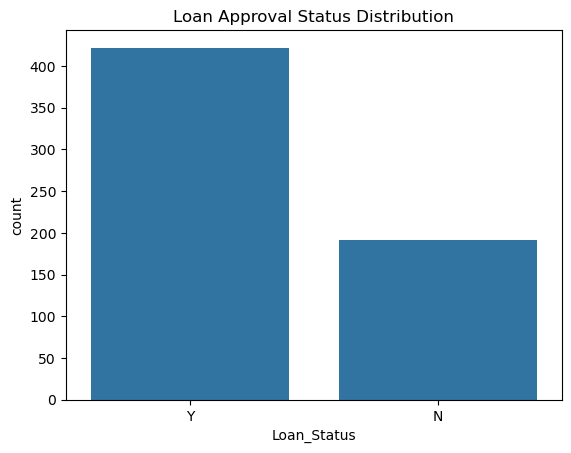

In [6]:
# Target distribution

sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Approval Status Distribution")
plt.show()

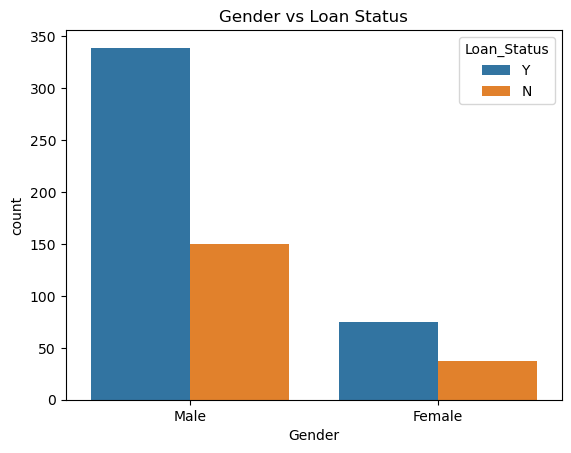

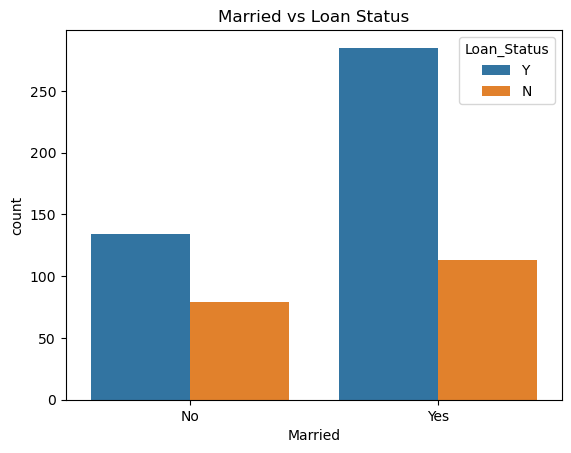

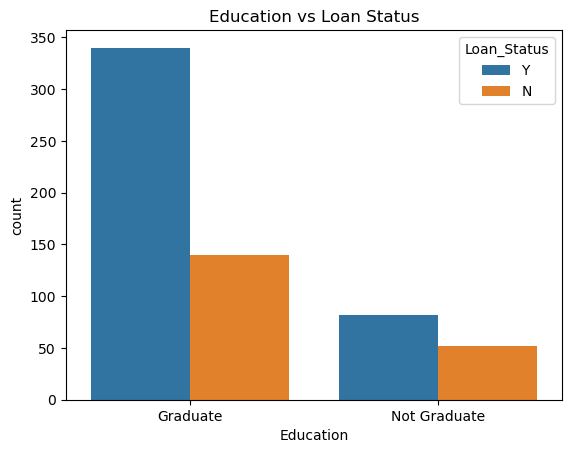

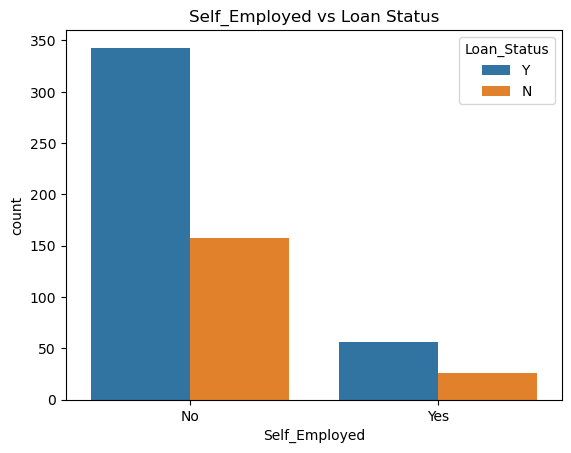

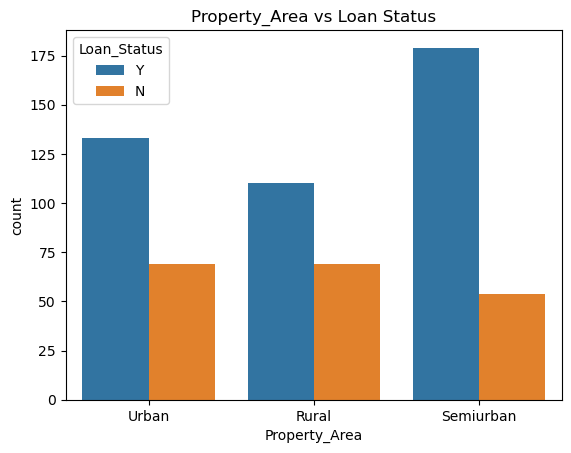

In [7]:
# Categorical vs Loan Status

for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f"{col} vs Loan Status")
    plt.show()

In [8]:
#  Data Cleaning      
# Drop the Loan_ID column

df.drop("Loan_ID", axis=1, inplace=True)

In [9]:
# Fill missing values

categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)
    

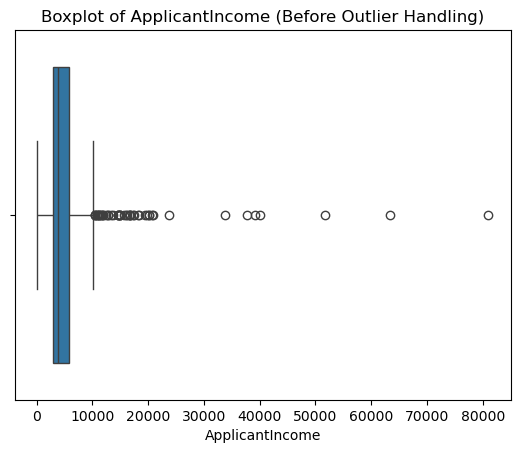

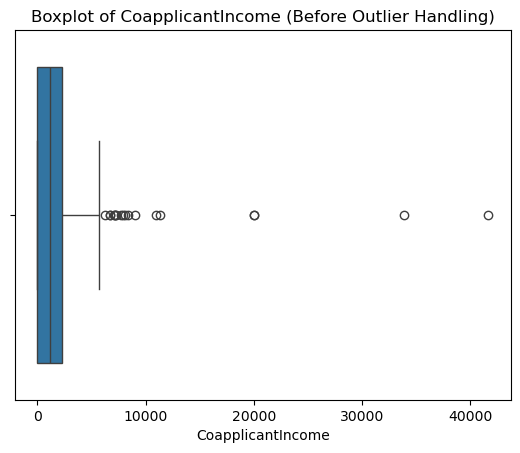

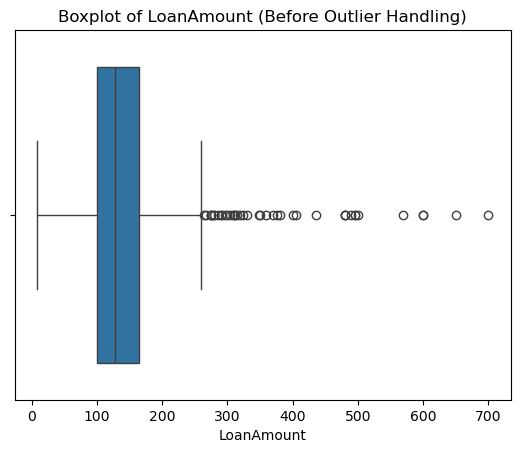

In [10]:
# Visualize Before Outlier Fix 
# Boxplots for numeric features

for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (Before Outlier Handling)")
    plt.show()

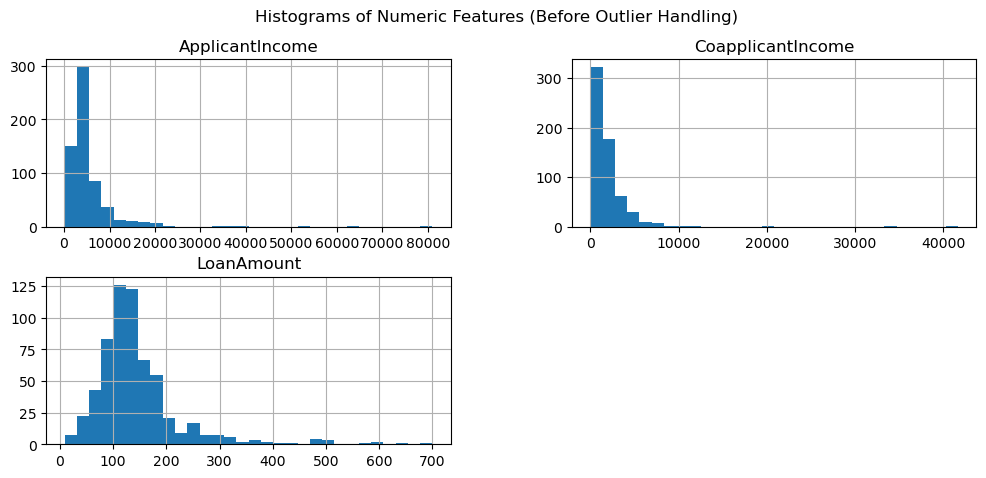

In [11]:
# Histograms

df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].hist(bins=30, figsize=(12, 5))
plt.suptitle("Histograms of Numeric Features (Before Outlier Handling)")
plt.show()

In [12]:
# Encode Categorical 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [13]:
#  Handle Outliers (IQR) 

def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper, upper,
                          np.where(df[column] < lower, lower, df[column]))

for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    cap_outliers(df, col)

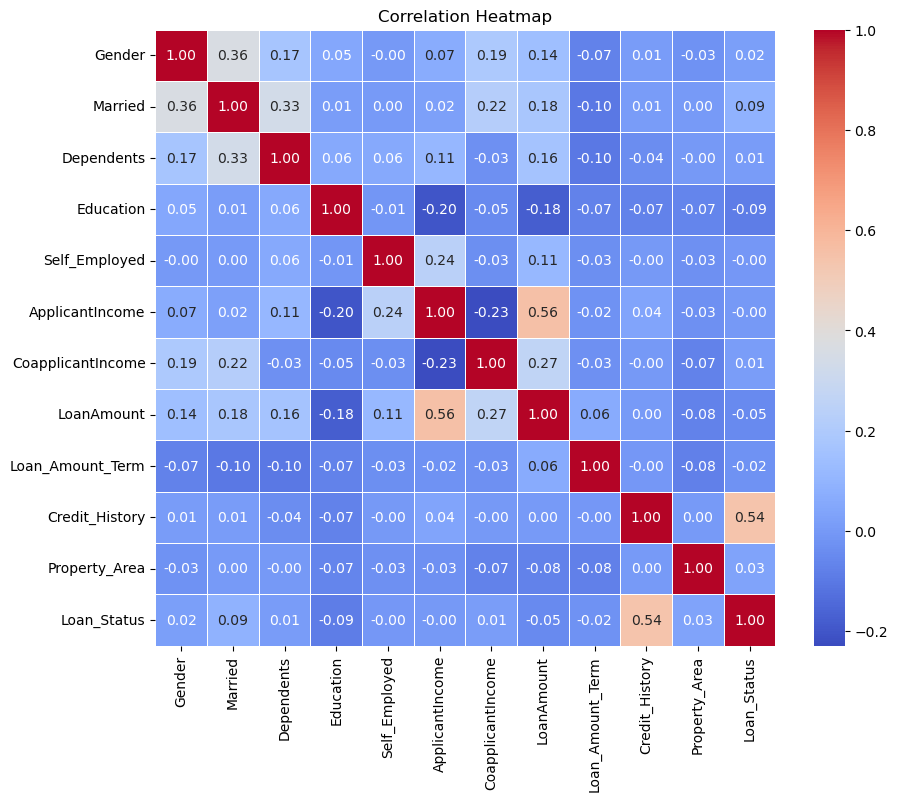

In [14]:
#  Correlation Heatmap 

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# Correlation with target

print("Correlation with Loan_Status:")
print(df.corr()["Loan_Status"].sort_values(ascending=False))

Correlation with Loan_Status:
Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
CoapplicantIncome    0.011983
Dependents           0.010118
ApplicantIncome     -0.000442
Self_Employed       -0.003700
Loan_Amount_Term    -0.022549
LoanAmount          -0.047262
Education           -0.085884
Name: Loan_Status, dtype: float64


In [16]:
# Feature and Target

X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]



In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [19]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7723577235772358
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.44      0.58        43
           1       0.76      0.95      0.84        80

    accuracy                           0.77       123
   macro avg       0.79      0.70      0.71       123
weighted avg       0.78      0.77      0.75       123



In [20]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7886178861788617
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [21]:
# Xg Boost Model
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7560975609756098
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.47      0.57        43
           1       0.76      0.91      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.69      0.70       123
weighted avg       0.75      0.76      0.74       123



In [22]:
# Kfold Cross Validation (10 splits)
from sklearn.model_selection import cross_val_score

# Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=10)
print("Random Forest Cross Validation Scores:", rf_scores)
print("Random Forest Cross Validation Accuracy:", rf_scores.mean())

# Logistic Regression
lr_scores = cross_val_score(lr_model, X, y, cv=10)
print("Logistic Regression Cross Validation Scores:", lr_scores)
print("Logistic Regression Cross Validation Accuracy:", lr_scores.mean())

# XGBoost
xgb_scores = cross_val_score(xgb_model, X, y, cv=10)
print("XGBoost Cross Validation Scores:", xgb_scores)
print("XGBoost Cross Validation Accuracy:", xgb_scores.mean())



Random Forest Cross Validation Scores: [0.77419355 0.79032258 0.77419355 0.72580645 0.78688525 0.7704918
 0.83606557 0.78688525 0.7704918  0.81967213]
Random Forest Cross Validation Accuracy: 0.7835007932310946
Logistic Regression Cross Validation Scores: [0.80645161 0.82258065 0.75806452 0.75806452 0.7704918  0.78688525
 0.86885246 0.85245902 0.80327869 0.83606557]
Logistic Regression Cross Validation Accuracy: 0.8063194077207825
XGBoost Cross Validation Scores: [0.77419355 0.74193548 0.74193548 0.74193548 0.73770492 0.78688525
 0.86885246 0.78688525 0.70491803 0.78688525]
XGBoost Cross Validation Accuracy: 0.7672131147540984


In [23]:
#  Save Best Model & Scaler
import joblib

# Assuming XGBoost performed best after K-Fold:
best_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
best_model.fit(X_scaled, y)  # Fit on full data

# Save model
joblib.dump(best_model, 'loan_approval_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully.")





Model and scaler saved successfully.
